In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(15)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
data.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [6]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [7]:
data["gender"] = data.gender.replace({'M':0, "F":1})

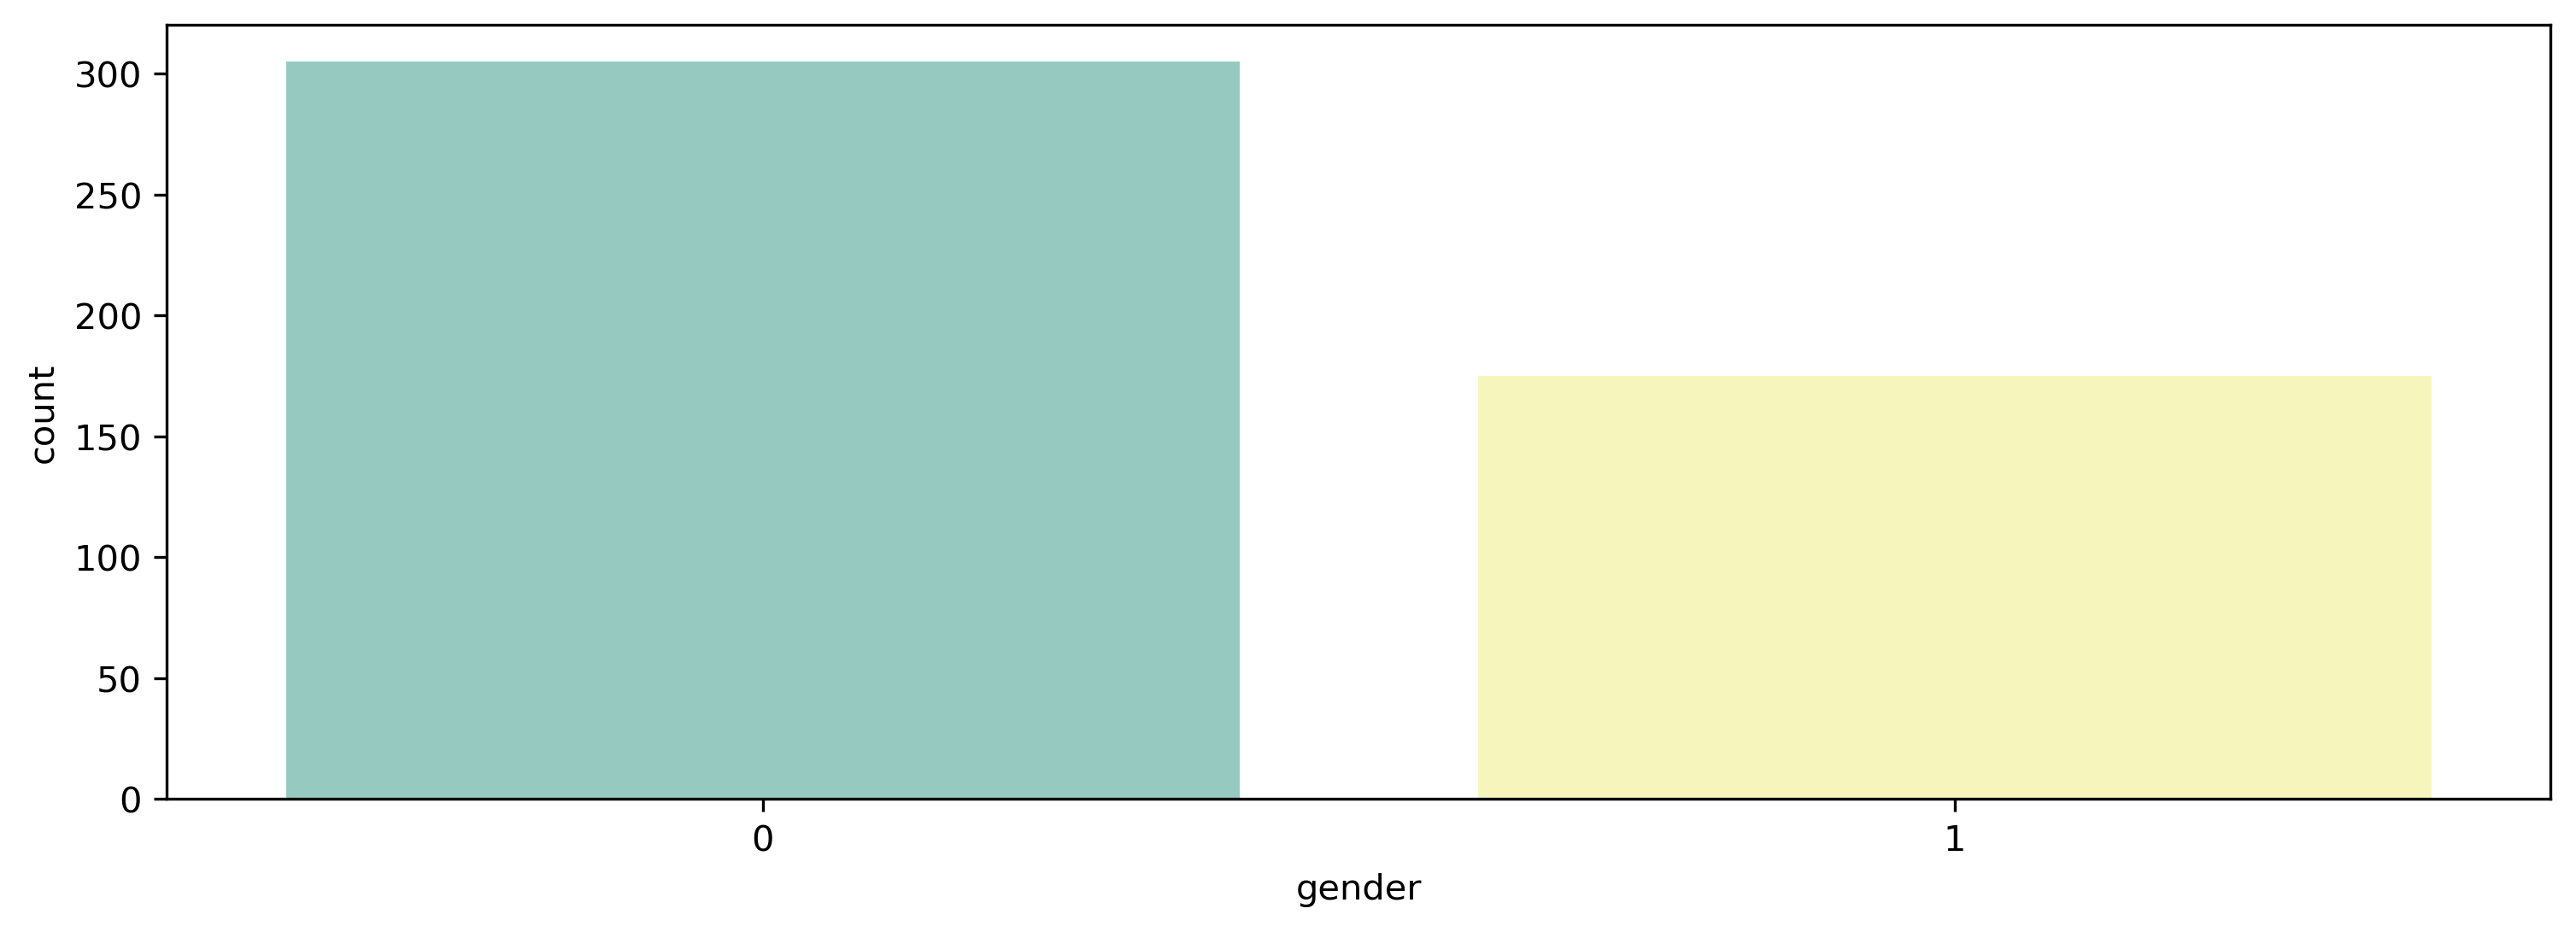

In [8]:
plt.figure(figsize=(12,4), dpi = 300)
sns.countplot(x = 'gender', data = data, palette="Set3")
plt.xticks(rotation = 0)
plt.show()

In [9]:
data.NationalITy.unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [10]:
data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
USA              6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [11]:
data.drop('NationalITy', axis=1, inplace=True)

In [12]:
data.PlaceofBirth.unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [13]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Lybia            6
Iran             6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [14]:
place_of_birth=pd.get_dummies(data.PlaceofBirth)

In [15]:
place_of_birth.head()

,Egypt,Iran,Iraq,Jordan,KuwaIT,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
data=pd.concat([data,place_of_birth],axis=1)

In [17]:
data.tail(10)

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,...,KuwaIT,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela
470,0,Jordan,MiddleSchool,G-08,A,History,F,Father,81,86,...,0,0,0,0,0,0,0,0,0,0
471,0,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,...,0,0,0,0,0,0,0,0,0,0
472,0,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,...,0,0,0,1,0,0,0,0,0,0
473,0,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,88,...,0,0,0,1,0,0,0,0,0,0
474,1,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,2,7,...,0,0,0,0,0,0,0,0,0,0
475,1,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,...,0,0,0,0,0,0,0,0,0,0
476,1,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,...,0,0,0,0,0,0,0,0,0,0
477,1,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,...,0,0,0,0,0,0,0,0,0,0
478,1,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,...,0,0,0,0,0,0,0,0,0,0
479,1,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    int64 
 1   PlaceofBirth              480 non-null    object
 2   StageID                   480 non-null    object
 3   GradeID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    object
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    object
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

In [19]:
data.drop('PlaceofBirth', axis=1, inplace=True)

In [20]:
data.StageID.unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

In [21]:
data["StageID"] = data.StageID.replace({'lowerlevel':0, "MiddleSchool":1,"HighSchool":2})

In [22]:
data.GradeID.unique()

array(['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11',
       'G-10', 'G-02'], dtype=object)

In [23]:
data["GradeID"] = data.StageID.replace({'G-04':0, "G-05":1,"G-06":2,'G-07':3, "G-08":4,"G-09":5,'G-10':6, "G-11":7,"G-12":8})

In [24]:
data.SectionID.unique()

array(['A', 'B', 'C'], dtype=object)

In [25]:
data["SectionID"] = data.SectionID.replace({'A':0, "B":1, "C":2})

In [26]:
data.Topic.unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [27]:
topic=pd.get_dummies(data.Topic)

In [28]:
topic

,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,1,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,1,0,0,0,0,0,0
477,0,0,0,0,0,1,0,0,0,0,0,0
478,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
data=pd.concat([data,topic],axis=1)

In [30]:
data

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,...,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
0,0,0,0,0,IT,F,Father,15,16,2,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,IT,F,Father,20,20,3,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,IT,F,Father,10,7,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,IT,F,Father,30,25,5,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,IT,F,Father,40,50,12,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1,1,0,Chemistry,S,Father,5,4,5,...,1,0,0,0,0,0,0,0,0,0
476,1,1,1,0,Geology,F,Father,50,77,14,...,0,0,0,1,0,0,0,0,0,0
477,1,1,1,0,Geology,S,Father,55,74,25,...,0,0,0,1,0,0,0,0,0,0
478,1,1,1,0,History,F,Father,30,17,14,...,0,0,0,0,1,0,0,0,0,0


In [31]:
data.drop('Topic', axis=1, inplace=True)

In [32]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,...,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
0,0,0,0,0,F,Father,15,16,2,20,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,F,Father,20,20,3,25,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,F,Father,10,7,0,30,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,F,Father,30,25,5,35,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,F,Father,40,50,12,50,...,0,0,0,0,0,1,0,0,0,0


In [33]:
data.Semester.unique()

array(['F', 'S'], dtype=object)

In [34]:
data["Semester"] = data.Semester.replace({"F":0, "S":1})

In [35]:
data["SectionID"] = data.SectionID.replace({'F':0, "S":1})

In [36]:
data.Relation.unique()

array(['Father', 'Mum'], dtype=object)

In [37]:
data["Relation"] = data.Relation.replace({'Father':0, "Mum":1})

In [38]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,...,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
0,0,0,0,0,0,0,15,16,2,20,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,20,20,3,25,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,10,7,0,30,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,30,25,5,35,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,40,50,12,50,...,0,0,0,0,0,1,0,0,0,0


In [39]:
data.raisedhands.unique()

array([ 15,  20,  10,  30,  40,  42,  35,  50,  12,  70,  19,   5,  62,
        36,  55,  69,  60,   2,   0,   8,  25,  75,   4,  45,  14,  33,
         7,  13,  29,  39,  49,  16,  28,  27,  21,  80,  17,  65,  22,
        11,   1,   3, 100,   6,  90,  77,  24,  66,  23,  82,  72,  51,
        85,  87,  95,  81,  53,  92,  83,  67,  96,  57,  73,   9,  32,
        52,  59,  61,  79,  18,  74,  97,  41,  71,  98,  78,  89,  88,
        86,  76,  99,  84], dtype=int64)

In [40]:
from sklearn.preprocessing import normalize

In [41]:
data["raisedhands_normalize"] = normalize(np.array(data["raisedhands"]).reshape(1,-1)).reshape(-1,1)

normal_features=["raisedhands_normalize","raisedhands"]

print('Minimum Value;\n',)
print(data[normal_features].min())
print("-------------------------------------")
print('\nMaximum Value;\n',)
print(data[normal_features].max())

Minimum Value;

raisedhands_normalize    0.0
raisedhands              0.0
dtype: float64
-------------------------------------

Maximum Value;

raisedhands_normalize      0.081542
raisedhands              100.000000
dtype: float64


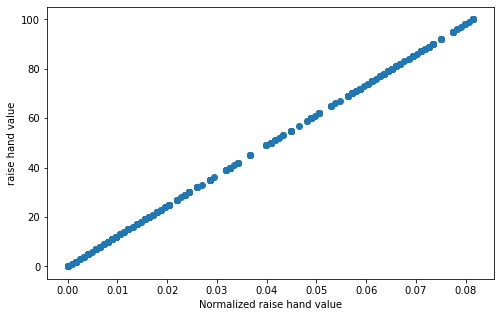

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(data[normal_features[0]], data[normal_features[1]])
plt.ylabel("raise hand value")
plt.xlabel("Normalized raise hand value")
plt.show()

In [43]:
data

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,...,English,French,Geology,History,IT,Math,Quran,Science,Spanish,raisedhands_normalize
0,0,0,0,0,0,0,15,16,2,20,...,0,0,0,0,1,0,0,0,0,0.012231
1,0,0,0,0,0,0,20,20,3,25,...,0,0,0,0,1,0,0,0,0,0.016308
2,0,0,0,0,0,0,10,7,0,30,...,0,0,0,0,1,0,0,0,0,0.008154
3,0,0,0,0,0,0,30,25,5,35,...,0,0,0,0,1,0,0,0,0,0.024462
4,0,0,0,0,0,0,40,50,12,50,...,0,0,0,0,1,0,0,0,0,0.032617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1,1,0,1,0,5,4,5,8,...,0,0,0,0,0,0,0,0,0,0.004077
476,1,1,1,0,0,0,50,77,14,28,...,0,0,1,0,0,0,0,0,0,0.040771
477,1,1,1,0,1,0,55,74,25,29,...,0,0,1,0,0,0,0,0,0,0.044848
478,1,1,1,0,0,0,30,17,14,57,...,0,0,0,1,0,0,0,0,0,0.024462


In [44]:
data.drop('raisedhands', axis=1, inplace=True)

In [45]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,...,English,French,Geology,History,IT,Math,Quran,Science,Spanish,raisedhands_normalize
0,0,0,0,0,0,0,16,2,20,Yes,...,0,0,0,0,1,0,0,0,0,0.012231
1,0,0,0,0,0,0,20,3,25,Yes,...,0,0,0,0,1,0,0,0,0,0.016308
2,0,0,0,0,0,0,7,0,30,No,...,0,0,0,0,1,0,0,0,0,0.008154
3,0,0,0,0,0,0,25,5,35,No,...,0,0,0,0,1,0,0,0,0,0.024462
4,0,0,0,0,0,0,50,12,50,No,...,0,0,0,0,1,0,0,0,0,0.032617


In [46]:
data.VisITedResources.unique()

array([16, 20,  7, 25, 50, 30, 12, 10, 21, 80, 88,  6,  1, 14, 70, 40, 13,
       15, 60,  0,  2, 19, 85, 90,  5, 22, 11, 54, 35, 33,  4, 39, 75, 69,
        3,  8, 89, 44, 92, 26, 27, 29, 98,  9, 42, 65, 79, 55, 63, 91, 51,
       58, 68, 82, 72, 52, 62, 71, 66, 43, 95, 31, 41, 81, 61, 83, 84, 17,
       94, 48, 86, 74, 76, 97, 87, 99, 34, 64, 28, 38, 36, 24, 59, 57, 77,
       18, 93, 96, 78], dtype=int64)

In [47]:
data["VisitedResources_normalize"] = normalize(np.array(data["VisITedResources"]).reshape(1,-1)).reshape(-1,1)

normal_features=["VisitedResources_normalize","VisITedResources"]

print('Minimum Value;\n',)
print(data[normal_features].min())
print("-------------------------------------")
print('\nMaximum Value;\n',)
print(data[normal_features].max())

Minimum Value;

VisitedResources_normalize    0.0
VisITedResources              0.0
dtype: float64
-------------------------------------

Maximum Value;

VisitedResources_normalize     0.070615
VisITedResources              99.000000
dtype: float64


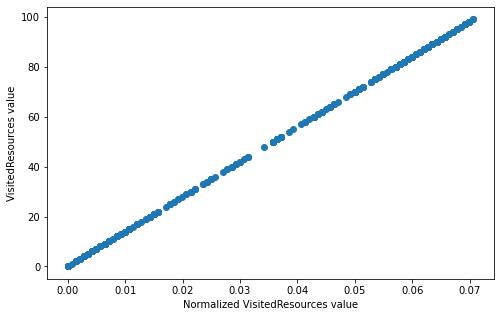

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(data[normal_features[0]], data[normal_features[1]])
plt.ylabel("VisitedResources value")
plt.xlabel("Normalized VisitedResources value")
plt.show()

In [49]:
data.drop('VisITedResources', axis=1, inplace=True)

In [50]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,...,French,Geology,History,IT,Math,Quran,Science,Spanish,raisedhands_normalize,VisitedResources_normalize
0,0,0,0,0,0,0,2,20,Yes,Good,...,0,0,0,1,0,0,0,0,0.012231,0.011413
1,0,0,0,0,0,0,3,25,Yes,Good,...,0,0,0,1,0,0,0,0,0.016308,0.014266
2,0,0,0,0,0,0,0,30,No,Bad,...,0,0,0,1,0,0,0,0,0.008154,0.004993
3,0,0,0,0,0,0,5,35,No,Bad,...,0,0,0,1,0,0,0,0,0.024462,0.017832
4,0,0,0,0,0,0,12,50,No,Bad,...,0,0,0,1,0,0,0,0,0.032617,0.035664


In [51]:
data.AnnouncementsView.unique()

array([ 2,  3,  0,  5, 12, 13, 15, 16, 25, 30, 19, 44, 22, 20, 35, 36, 40,
       33,  4, 52, 50, 10,  9,  8, 17, 26, 37,  7, 28,  1, 39,  6, 32, 70,
       18, 23, 11, 29, 49, 55, 38, 41, 51, 95, 85, 71, 98, 73, 48, 58, 93,
       83, 53, 63, 62, 82, 72, 42, 46, 77, 21, 88, 66, 86, 80, 56, 91, 65,
       76, 24, 74, 59, 79, 34, 69, 89, 31, 60, 54, 57, 64, 87, 75, 67, 43,
       45, 14, 78], dtype=int64)

In [52]:
data["AnnouncementsView_normalize"] = normalize(np.array(data["AnnouncementsView"]).reshape(1,-1)).reshape(-1,1)

normal_features=["AnnouncementsView_normalize","AnnouncementsView"]

print('Minimum Value;\n',)
print(data[normal_features].min())
print("-------------------------------------")
print('\nMaximum Value;\n',)
print(data[normal_features].max())

Minimum Value;

AnnouncementsView_normalize    0.0
AnnouncementsView              0.0
dtype: float64
-------------------------------------

Maximum Value;

AnnouncementsView_normalize     0.096592
AnnouncementsView              98.000000
dtype: float64


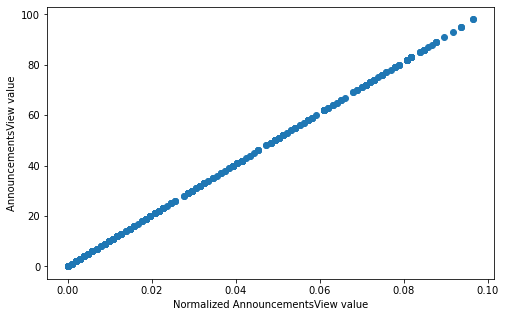

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(data[normal_features[0]], data[normal_features[1]])
plt.ylabel("AnnouncementsView value")
plt.xlabel("Normalized AnnouncementsView value")
plt.show()

In [54]:
data.drop('AnnouncementsView', axis=1, inplace=True)

In [55]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Geology,History,IT,Math,Quran,Science,Spanish,raisedhands_normalize,VisitedResources_normalize,AnnouncementsView_normalize
0,0,0,0,0,0,0,20,Yes,Good,Under-7,...,0,0,1,0,0,0,0,0.012231,0.011413,0.001971
1,0,0,0,0,0,0,25,Yes,Good,Under-7,...,0,0,1,0,0,0,0,0.016308,0.014266,0.002957
2,0,0,0,0,0,0,30,No,Bad,Above-7,...,0,0,1,0,0,0,0,0.008154,0.004993,0.000000
3,0,0,0,0,0,0,35,No,Bad,Above-7,...,0,0,1,0,0,0,0,0.024462,0.017832,0.004928
4,0,0,0,0,0,0,50,No,Bad,Above-7,...,0,0,1,0,0,0,0,0.032617,0.035664,0.011828


In [56]:
data.Discussion.unique()

array([20, 25, 30, 35, 50, 70, 17, 22, 80, 12, 11, 19, 60, 66, 90, 96, 99,
       40, 33, 43, 16,  4, 88, 77, 75,  1,  5,  2,  8, 13, 44,  9, 55, 10,
       15,  7,  3, 14, 69, 59, 89, 41, 91, 49, 73, 23, 53, 93, 51, 83, 24,
       84, 61, 94, 34, 81, 29, 46, 26,  6, 76, 86, 85, 65, 95, 64, 32, 37,
       36, 27, 39, 74, 79, 21, 31, 28, 38, 48, 97, 98, 63, 72, 82, 71, 45,
       68, 92, 58, 57, 62], dtype=int64)

In [57]:
data["Discussion_normalize"] = normalize(np.array(data["Discussion"]).reshape(1,-1)).reshape(-1,1)

normal_features=["Discussion_normalize","Discussion"]

print('Minimum Value;\n',)
print(data[normal_features].min())
print("-------------------------------------")
print('\nMaximum Value;\n',)
print(data[normal_features].max())

Minimum Value;

Discussion_normalize    0.000889
Discussion              1.000000
dtype: float64
-------------------------------------

Maximum Value;

Discussion_normalize     0.088017
Discussion              99.000000
dtype: float64


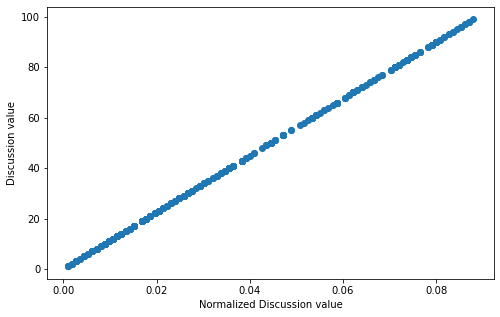

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(data[normal_features[0]], data[normal_features[1]])
plt.ylabel("Discussion value")
plt.xlabel("Normalized Discussion value")
plt.show()

In [59]:
data.drop('Discussion', axis=1, inplace=True)

In [60]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,...,History,IT,Math,Quran,Science,Spanish,raisedhands_normalize,VisitedResources_normalize,AnnouncementsView_normalize,Discussion_normalize
0,0,0,0,0,0,0,Yes,Good,Under-7,M,...,0,1,0,0,0,0,0.012231,0.011413,0.001971,0.017781
1,0,0,0,0,0,0,Yes,Good,Under-7,M,...,0,1,0,0,0,0,0.016308,0.014266,0.002957,0.022227
2,0,0,0,0,0,0,No,Bad,Above-7,L,...,0,1,0,0,0,0,0.008154,0.004993,0.000000,0.026672
3,0,0,0,0,0,0,No,Bad,Above-7,L,...,0,1,0,0,0,0,0.024462,0.017832,0.004928,0.031117
4,0,0,0,0,0,0,No,Bad,Above-7,M,...,0,1,0,0,0,0,0.032617,0.035664,0.011828,0.044453


In [61]:
data.ParentAnsweringSurvey.unique()

array(['Yes', 'No'], dtype=object)

In [62]:
data["ParentAnsweringSurvey"] = data.ParentAnsweringSurvey.replace({'Yes':1, "No":0})

In [63]:
data.ParentschoolSatisfaction.unique()

array(['Good', 'Bad'], dtype=object)

In [64]:
data["ParentschoolSatisfaction"] = data.ParentschoolSatisfaction.replace({'Good':1, "Bad":0})

In [65]:
data.StudentAbsenceDays.unique()

array(['Under-7', 'Above-7'], dtype=object)

In [66]:
data["StudentAbsenceDays"] = data.StudentAbsenceDays.replace({'Under-7':0, "Above-7":1})

In [67]:
data.head()

,gender,StageID,GradeID,SectionID,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,...,History,IT,Math,Quran,Science,Spanish,raisedhands_normalize,VisitedResources_normalize,AnnouncementsView_normalize,Discussion_normalize
0,0,0,0,0,0,0,1,1,0,M,...,0,1,0,0,0,0,0.012231,0.011413,0.001971,0.017781
1,0,0,0,0,0,0,1,1,0,M,...,0,1,0,0,0,0,0.016308,0.014266,0.002957,0.022227
2,0,0,0,0,0,0,0,0,1,L,...,0,1,0,0,0,0,0.008154,0.004993,0.000000,0.026672
3,0,0,0,0,0,0,0,0,1,L,...,0,1,0,0,0,0,0.024462,0.017832,0.004928,0.031117
4,0,0,0,0,0,0,0,0,1,M,...,0,1,0,0,0,0,0.032617,0.035664,0.011828,0.044453


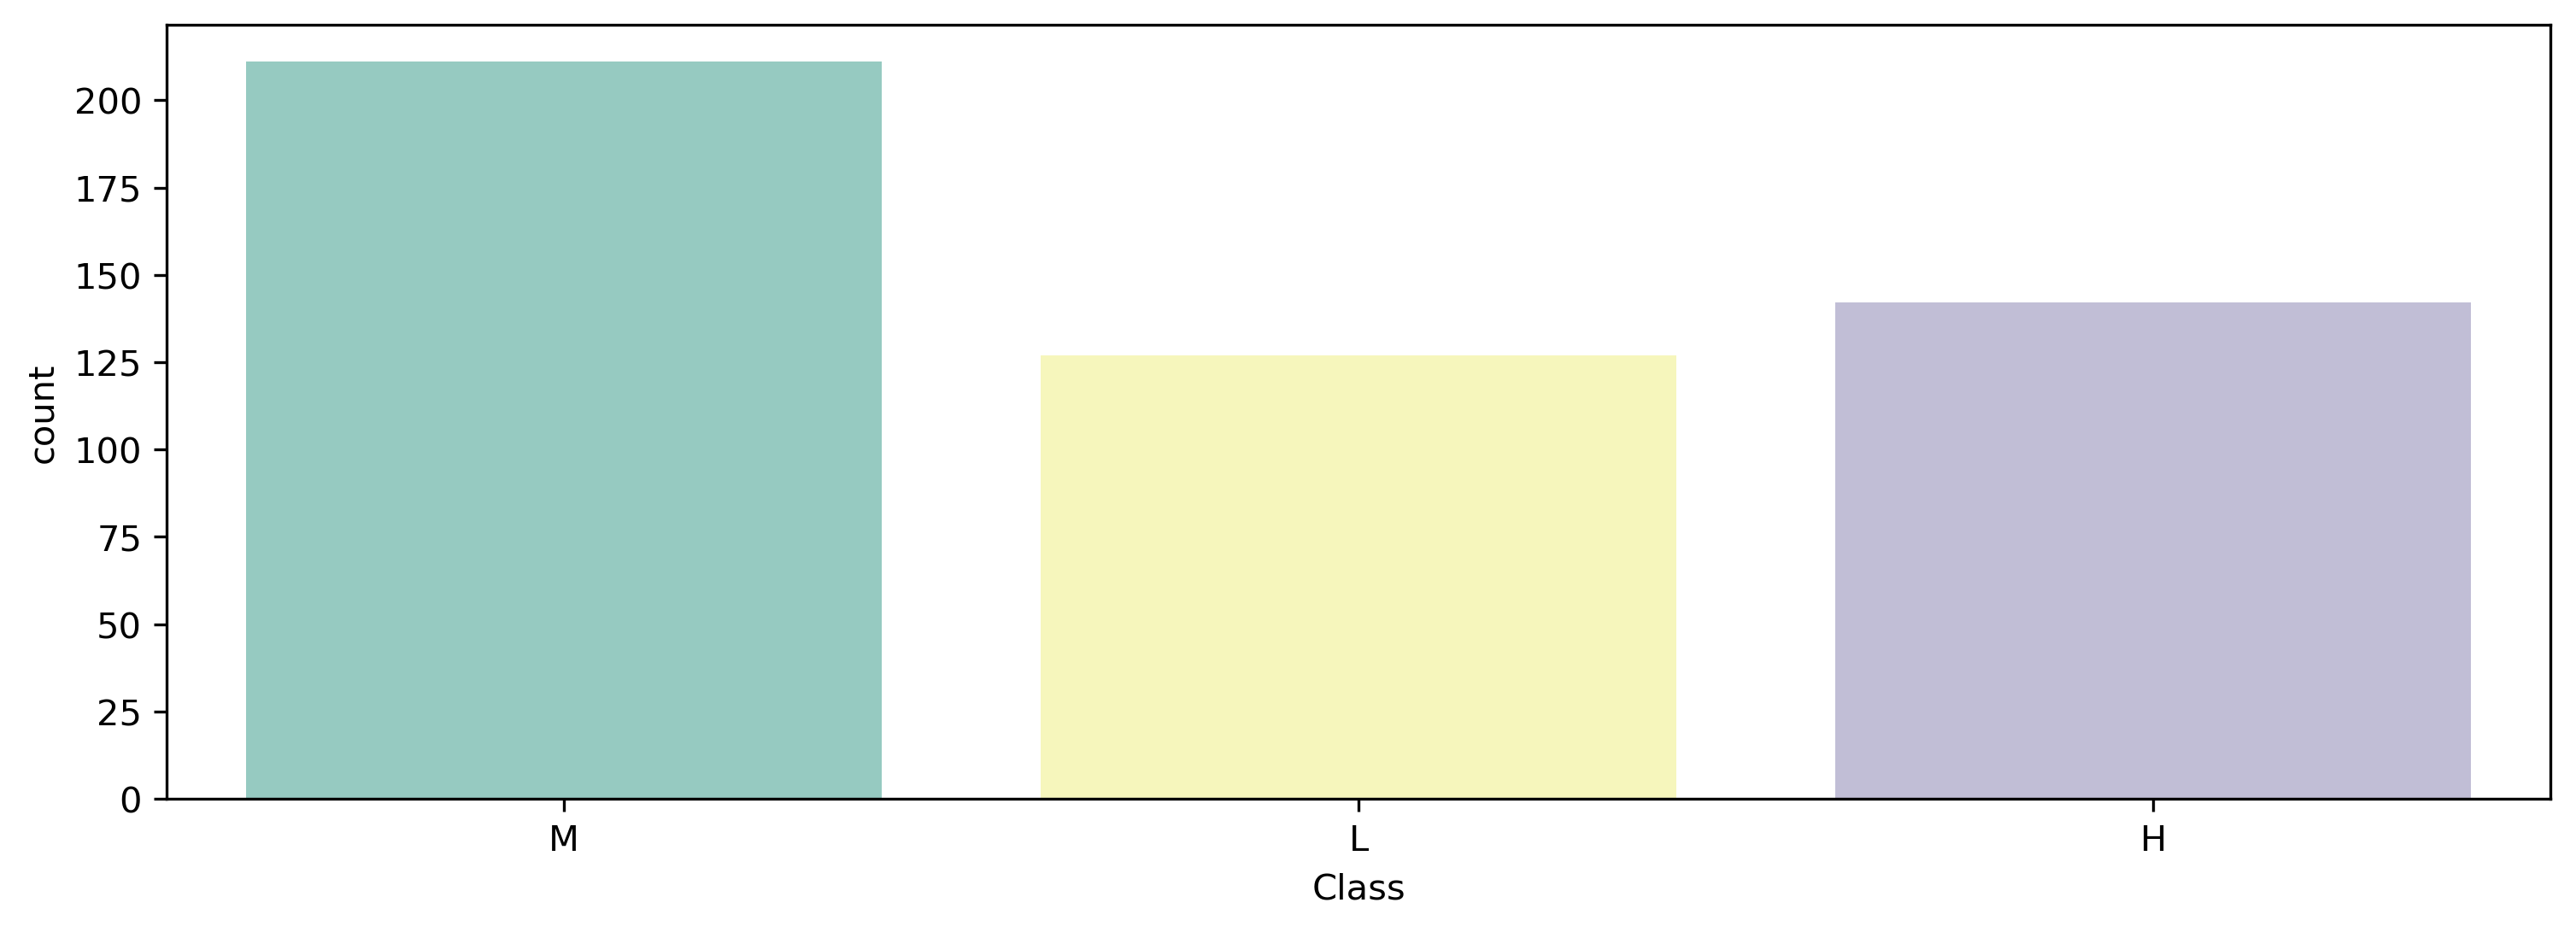

In [68]:
plt.figure(figsize=(12,4), dpi = 300)
sns.countplot(x = 'Class', data = data, palette="Set3")
plt.xticks(rotation = 0)
plt.show()

#### Low-Level: interval includes values from 0 to 69,
#### Middle-Level: interval includes values from 70 to 89,
#### High-Level: interval includes values from 90-100.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.tree import DecisionTreeClassifier

X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)
decisiontree=DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

In [71]:
decisiontreepredict=decisiontree.predict(X_test)

In [72]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 68.33%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.69      0.51      0.59        68
           L       0.75      0.77      0.76        60
           M       0.65      0.74      0.69       112

    accuracy                           0.68       240
   macro avg       0.70      0.67      0.68       240
weighted avg       0.69      0.68      0.68       240

_______________________________________________
Confusion Matrix: 
 [[35  0 33]
 [ 2 46 12]
 [14 15 83]]



In [73]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=222)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
decisiontreepredict=decisiontree.predict(X_test)

In [75]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 89.17%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.86      0.86      0.86        28
           L       0.95      0.92      0.94        39
           M       0.87      0.89      0.88        53

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

_______________________________________________
Confusion Matrix: 
 [[24  0  4]
 [ 0 36  3]
 [ 4  2 47]]



In [76]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=222)
DecisionTreeClassifier().fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
decisiontreepredict=decisiontree.predict(X_test)

In [78]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 86.67%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.85      0.77      0.81        61
           L       0.93      0.93      0.93        68
           M       0.84      0.88      0.86       111

    accuracy                           0.87       240
   macro avg       0.87      0.86      0.87       240
weighted avg       0.87      0.87      0.87       240

_______________________________________________
Confusion Matrix: 
 [[47  0 14]
 [ 0 63  5]
 [ 8  5 98]]



In [79]:
score_accuracy=cross_val_score(decisiontree,X,y,cv=10,scoring="accuracy").mean()
score_accuracy

0.61875

In [80]:
scores = cross_val_score(decisiontree,X,y, cv=10, scoring= 'f1_weighted')
print(scores.mean())

0.6009473563103961


In [81]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=222)
DecisionTreeClassifier().fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
decisiontreepredict=decisiontree.predict(X_test)

In [83]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 88.89%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.85      0.85      0.85        34
           L       0.95      0.91      0.93        45
           M       0.87      0.89      0.88        65

    accuracy                           0.89       144
   macro avg       0.89      0.89      0.89       144
weighted avg       0.89      0.89      0.89       144

_______________________________________________
Confusion Matrix: 
 [[29  0  5]
 [ 0 41  4]
 [ 5  2 58]]



### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=222)
rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(X_train, y_train)
y_tahmin_ro = rastgele_orman.predict(X_test)

In [85]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, y_tahmin_ro) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_tahmin_ro)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_tahmin_ro)}\n")

Train Result:
Accuracy Score: 83.33%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.70      0.97      0.81        34
           L       0.91      0.87      0.89        45
           M       0.89      0.74      0.81        65

    accuracy                           0.83       144
   macro avg       0.83      0.86      0.84       144
weighted avg       0.85      0.83      0.83       144

_______________________________________________
Confusion Matrix: 
 [[33  0  1]
 [ 1 39  5]
 [13  4 48]]



In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
score_accuracy=cross_val_score(rastgele_orman,X,y,cv=5,scoring="accuracy").mean()

In [88]:
score_accuracy

0.65

In [89]:
scores = cross_val_score(rastgele_orman,X,y, cv=5, scoring= 'f1_weighted')
print(scores.mean())

0.6438225301828535


In [90]:
scores.mean()

0.6438225301828535